In [2]:
import numpy as np
import pandas as pd
import numpy.random as random
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [3]:
data = pd.read_csv('data/data_set_ALL_AML_train.csv')
y = pd.read_csv('data/actual.csv')
y = y['cancer'][:38]

In [4]:
data = data[[col for col in data.columns if "call" not in col]]
data.dtypes

Gene Description         object
Gene Accession Number    object
1                         int64
2                         int64
3                         int64
4                         int64
5                         int64
6                         int64
7                         int64
8                         int64
9                         int64
10                        int64
11                        int64
12                        int64
13                        int64
14                        int64
15                        int64
16                        int64
17                        int64
18                        int64
19                        int64
20                        int64
21                        int64
22                        int64
23                        int64
24                        int64
25                        int64
26                        int64
27                        int64
34                        int64
35                        int64
36      

In [5]:
data = data.T
data = data.drop(['Gene Description','Gene Accession Number'],axis=0)
data.shape

(38, 7129)

In [6]:
data['class'] = y.values
dic = {'ALL':0,'AML':1}
data.replace(dic,inplace=True)
data=data.T
data.shape

(7130, 38)

In [7]:
data.loc['class'].value_counts(normalize=True)

0    0.710526
1    0.289474
Name: class, dtype: float64

In [8]:
mat = data.drop('class',axis=0)
A = mat - mat.mean()

In [9]:
u,s,v_t = linalg.svd(A)
diag_s = np.zeros((A.shape[0], A.shape[1]))
diag_s[:A.shape[1], :A.shape[1]] = np.diag(s)

In [10]:
linalg.norm(u.dot(diag_s.dot(v_t))-A)

4.334524907569455e-09

In [11]:
PC = np.diag(s[:2]).dot(v_t[:2,])

In [12]:
print(PC.shape)
PC = PC.T

(2, 38)


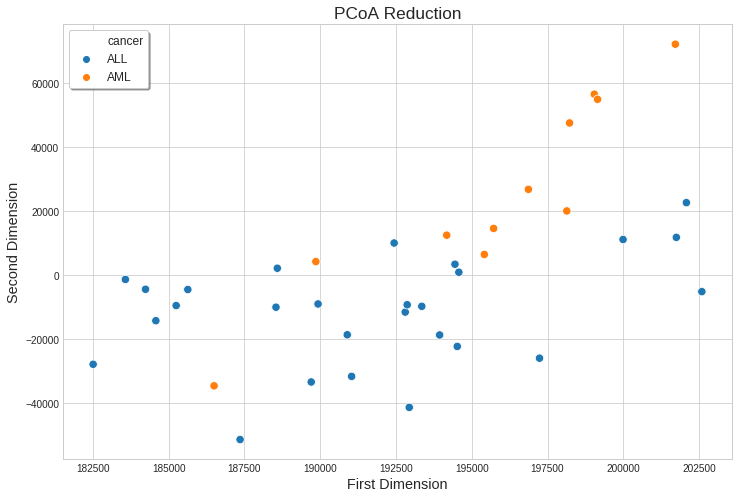

In [13]:
plt.figure(figsize=(12,8))
plt.title('PCoA Reduction',size='xx-large')
plt.xlabel('First Dimension',size='x-large')
plt.ylabel('Second Dimension',size='x-large')
sns.scatterplot(PC[:,0],PC[:,1],hue=y,s=70)
plt.legend(fontsize='large',frameon=True,shadow=True)

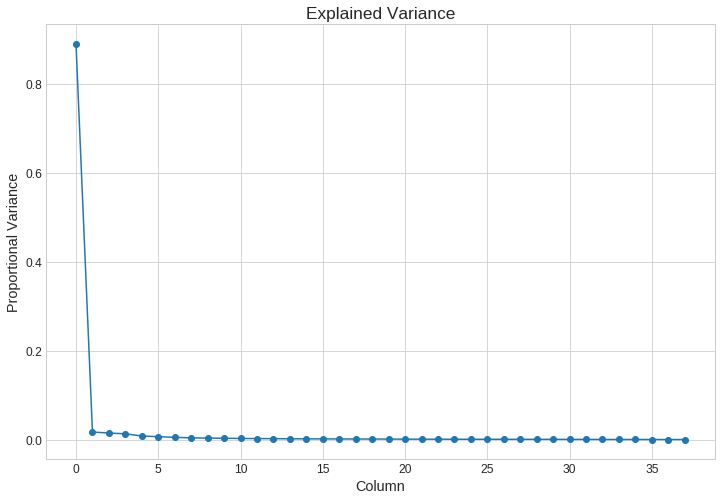

In [14]:
plt.figure(figsize=(12,8))
plt.title('Explained Variance',size='xx-large')
plt.xlabel('Column',size='x-large')
plt.xticks(size='large')
plt.ylabel('Proportional Variance',size='x-large')
plt.yticks(size='large')
plt.plot(s*s/s.dot(s),marker='o')


In [1]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
PC = np.diag(s[:3]).dot(v_t[:3,])

In [16]:
print(PC.shape)
PC = PC.T

(3, 38)


[]

<Figure size 432x288 with 0 Axes>

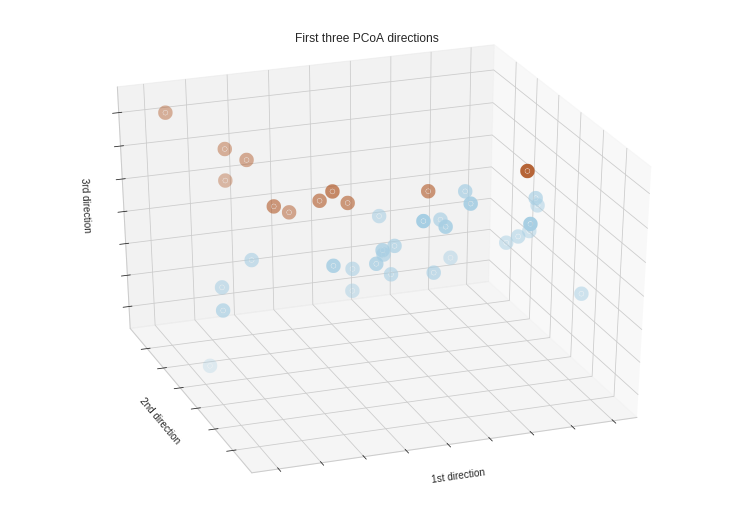

In [42]:
#y.replace({'ALL':0,'AML':1},inplace=True)
plt.clf()
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(PC[:,0],PC[:,1],PC[:,2],c=y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCoA directions")
ax.set_xlabel("1st direction")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd direction")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd direction")
ax.w_zaxis.set_ticklabels([])
